# 🩺 PO_69 Project GlycoTrack: Predicting Diabetes Risk

# Executive Summary
This project analyzes a subset of the CDC’s Behavioral Risk Factor Surveillance System (BRFSS) data to explore factors associated with diabetes in U.S. adults.  
The dataset combines **medical history, lifestyle habits, functional limitations, and demographics** to identify key predictors of diabetes.  
Our goal is to prepare, clean, and analyze this data to support predictive modeling and public health insights.

---

## 🔍 Data Source and Dataset Overview

### Data Source
The dataset originates from the **Behavioral Risk Factor Surveillance System (BRFSS)**, an annual health-related survey conducted by the **Centers for Disease Control and Prevention (CDC)** and U.S. state health departments.

**About BRFSS:**
- **Purpose:** Monitors health-related risk behaviors, chronic health conditions, and use of preventive services.
- **Method:** Random-digit–dialed telephone interviews (landline & cell phone).
- **Coverage:** U.S. adults aged 18+, ~400,000 interviews annually.
- **Reliability:** Standardized questions, weighted to represent the U.S. population.

This dataset focuses on **health, lifestyle, functional, and demographic indicators** relevant to **diabetes risk assessment**.

---

### Dataset Variables and Key Groups

**1. Health Status & Chronic Conditions**
- `Diabetes_binary` – **Target variable** (0 = No diabetes, 1 = Diabetes)
- `HighBP` – High blood pressure
- `HighChol` – High cholesterol
- `CholCheck` – Cholesterol check in last 5 years
- `Stroke` – History of stroke
- `HeartDiseaseorAttack` – Coronary heart disease or heart attack

**2. Lifestyle & Behavior**
- `Smoker` – Ever smoked ≥ 100 cigarettes
- `PhysActivity` – Physical activity in past month
- `Fruits` – Consumes fruit 1+ times/day
- `Veggies` – Consumes vegetables 1+ times/day
- `HvyAlcoholConsump` – Heavy alcohol consumption
- `AnyHealthcare` – Has healthcare coverage
- `NoDocbcCost` – Could not see a doctor due to cost

**3. Functional Limitations**
- `DiffWalk` – Difficulty walking or climbing stairs

**4. Numerical Measures**
- `BMI` – Body Mass Index
- `MentHlth` – Days mental health not good (past 30 days)
- `PhysHlth` – Days physical health not good (past 30 days)
- `GenHlth` – General health rating (1 = Excellent → 5 = Poor)

**5. Demographics**
- `Sex` – 0 = Female, 1 = Male
- `Age` – Age group (1 = 18–24, 13 = 80+)
- `Education` – Education level (1 = No school → 6 = College 4+ years)
- `Income` – Income category (1 = < $10,000 → 8 = ≥ $75,000)

---

**Why This Dataset is Valuable:**
- Large, representative sample from a trusted public health source.
- Contains both medical and lifestyle variables, enabling predictive modeling.
- Features are mostly binary or numeric, simplifying preprocessing and model development.

![Project Cover](uploaded_image.png)

# ==============================================
# 🧩 Day 1- Environment Setup & Raw Dataset Overview
# ==============================================
 ---
This notebook performs:
1. Importing required libraries
2. Loading and exploring the dataset
3. Inspecting data types, missing values, and duplicates
4. Outlining initial cleaning steps
---

In [1]:
# 1️⃣ Import Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, os, random
warnings.filterwarnings("ignore")

SEED = 42
random.seed(SEED); np.random.seed(SEED)
warnings.filterwarnings('ignore')
RAW_CSV = "CDC_Diabetes_Health_Indicators.csv"
CLEANED_CSV = "CDC_Diabetes_Health_Indicators_Cleaned.csv"
PLOTS_DIR = "plots"
os.makedirs(os.path.join(PLOTS_DIR,"EDA"), exist_ok=True)
os.makedirs(os.path.join(PLOTS_DIR,"Models"), exist_ok=True)
os.makedirs(os.path.join(PLOTS_DIR,"SHAP"), exist_ok=True)
print("Environment ready.")

Environment ready.


In [2]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [3]:
!pip install xgboost
!pip install shap

# 🔍 Day 2 – Data Exploration & Initial Cleaning
# =========================================

We start by understanding the shape, types, and summary statistics of the dataset.

In [4]:
# 2️⃣ ✅ Load dataset
if not os.path.exists(RAW_CSV):
    raise FileNotFoundError(f"Place raw CSV at {RAW_CSV}")
df= pd.read_csv(RAW_CSV)

In [5]:
# 3️⃣ Basic Info

df.head()

,Unnamed: 0,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,7.0,6.0,1.0,0.0
2,2,1.0,1.0,1.0,28.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,NaN,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,3,1.0,NaN,1.0,27.0,NaN,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,NaN,5.0,4.0,0.0


In [6]:
# ✅ Inspect dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            253680 non-null  int64  
 1   HighBP                229828 non-null  float64
 2   HighChol              242676 non-null  float64
 3   CholCheck             233115 non-null  float64
 4   BMI                   234738 non-null  float64
 5   Smoker                240357 non-null  float64
 6   Stroke                245348 non-null  float64
 7   HeartDiseaseorAttack  251138 non-null  float64
 8   PhysActivity          246643 non-null  float64
 9   Fruits                235184 non-null  float64
 10  Veggies               231714 non-null  float64
 11  HvyAlcoholConsump     233561 non-null  float64
 12  AnyHealthcare         249677 non-null  float64
 13  NoDocbcCost           250181 non-null  object 
 14  GenHlth               241449 non-null  float64
 15  

In [7]:
# 4️⃣ Missing Values Check
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 HighBP                  23852
HighChol                11004
CholCheck               20565
BMI                     18942
Smoker                  13323
Stroke                   8332
HeartDiseaseorAttack     2542
PhysActivity             7037
Fruits                  18496
Veggies                 21966
HvyAlcoholConsump       20119
AnyHealthcare            4003
NoDocbcCost              3499
GenHlth                 12231
MentHlth                 7518
PhysHlth                24242
DiffWalk                13310
Sex                      6347
Age                     21173
Education               19613
Income                  14787
Diabetes_binary          2692
dtype: int64


In [8]:
# 5️⃣ Duplicate Records
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [9]:
# 6️⃣ Basic Statistics
df.describe().T
df.to_csv('Basic_Statisticss.csv', index=False)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.000000
HighBP,229828.0,0.428516,0.494865,0.0,0.00,0.0,1.00,1.000000
HighChol,242676.0,0.424014,0.494193,0.0,0.00,0.0,1.00,1.000000
CholCheck,233115.0,0.962834,0.189169,0.0,1.00,1.0,1.00,1.000000
BMI,234738.0,28.384859,6.607251,12.0,24.00,27.0,31.00,98.000000
Smoker,240357.0,0.443187,0.496763,0.0,0.00,0.0,1.00,1.000000
Stroke,245348.0,0.040530,0.197200,0.0,0.00,0.0,0.00,1.000000
HeartDiseaseorAttack,251138.0,0.094251,0.292178,0.0,0.00,0.0,0.00,1.000000
PhysActivity,246643.0,0.756559,0.429160,0.0,1.00,1.0,1.00,1.000000
Fruits,235184.0,0.634452,0.481584,0.0,0.00,1.0,1.00,1.000000


## 🧹 Day 3 – Data Cleaning & Preprocessing Notebook
# =========================================

---
Key Goals:

1. Handle missing values (if any).

2. Remove duplicates.

3. Ensure correct data types.

4. Basic outlier detection.

5. Encode categorical variables if needed.

6. Prepare cleaned dataset for EDA/Modeling.
---

In [10]:
# 1️⃣ Import required Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [11]:
# 2️⃣ Remove Duplicates
initial_shape = df.shape
df.drop_duplicates(inplace=True)
print(f"Removed {initial_shape[0] - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [12]:
# 3️⃣ Handle Missing Values
# (This dataset typically has no missing values, but we’ll check)
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])
df.dropna(inplace=True)  # Only if missing values are minimal

Missing Values:
 HighBP                  23852
HighChol                11004
CholCheck               20565
BMI                     18942
Smoker                  13323
Stroke                   8332
HeartDiseaseorAttack     2542
PhysActivity             7037
Fruits                  18496
Veggies                 21966
HvyAlcoholConsump       20119
AnyHealthcare            4003
NoDocbcCost              3499
GenHlth                 12231
MentHlth                 7518
PhysHlth                24242
DiffWalk                13310
Sex                      6347
Age                     21173
Education               19613
Income                  14787
Diabetes_binary          2692
dtype: int64


In [13]:
# 4️⃣ Drop unnecessary columns if present
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

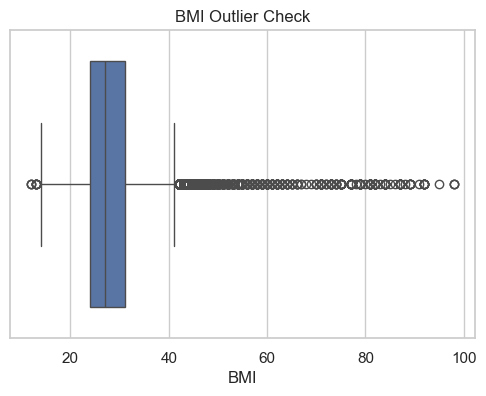

Saved Outlier Detection before remove.


In [14]:
# 5️⃣ Outlier Detection – Before Removal (Boxplot for BMI)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title("BMI Outlier Check")
plt.savefig(os.path.join(PLOTS_DIR,'EDA','Outlier_Detection.png'))
plt.show()
print('Saved Outlier Detection before remove.')


In [15]:
# Remove Extreme Outliers (IQR Method)
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['BMI'] >= Q1 - 1.5*IQR) & (df['BMI'] <= Q3 + 1.5*IQR)]


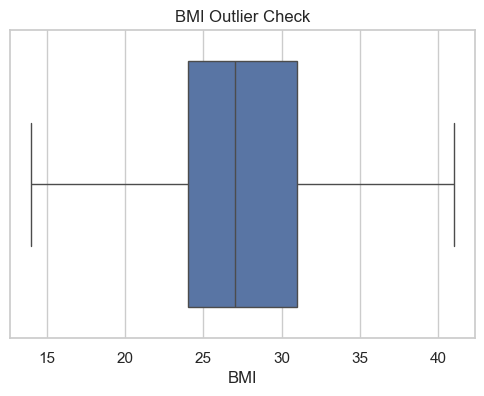

Saved Outlier Detection after remove extreme outliers.


In [16]:
# Outlier Detection – After Removal (Boxplot for BMI)
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title("BMI Outlier Check")
plt.savefig(os.path.join(PLOTS_DIR,'EDA','after_extreme_Outlier_Detection.png'))
plt.show()
print('Saved Outlier Detection after remove extreme outliers.')

In [17]:
# 6️⃣ Save Cleaned Dataset
df.to_csv("CDC_Diabetes_Health_Indicators_Cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


# =====================
#  📊 Day 4 – Exploratory Data Analysis (EDA)
# ====================
---
# Goals:

Understand variable distributions and relationships

Detect trends and correlations that might indicate diabetes risk factors

Prepare insights for feature engineering

EDA helps us understand the dataset’s structure, identify patterns, detect anomalies, and explore relationships among features before modeling.

Today’s steps:
1. Univariate analysis – distributions of numerical & categorical variables  
2. Bivariate analysis – feature relationships with target variable (Diabetes)  
3. Multivariate analysis – interactions between features  
4. Insights & narratives

---

In [18]:
# Load cleaned dataset
df = pd.read_csv("CDC_Diabetes_Health_Indicators_Cleaned.csv")

In [19]:
# Basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72776 entries, 0 to 72775
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                72776 non-null  float64
 1   HighChol              72776 non-null  float64
 2   CholCheck             72776 non-null  float64
 3   BMI                   72776 non-null  float64
 4   Smoker                72776 non-null  float64
 5   Stroke                72776 non-null  float64
 6   HeartDiseaseorAttack  72776 non-null  float64
 7   PhysActivity          72776 non-null  float64
 8   Fruits                72776 non-null  float64
 9   Veggies               72776 non-null  float64
 10  HvyAlcoholConsump     72776 non-null  float64
 11  AnyHealthcare         72776 non-null  float64
 12  NoDocbcCost           72776 non-null  object 
 13  GenHlth               72776 non-null  float64
 14  MentHlth              72776 non-null  float64
 15  PhysHlth           

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0,0.0
2,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0,1.0
3,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0,0.0
4,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,30.0,1.0,0.0,10.0,5.0,1.0,0.0


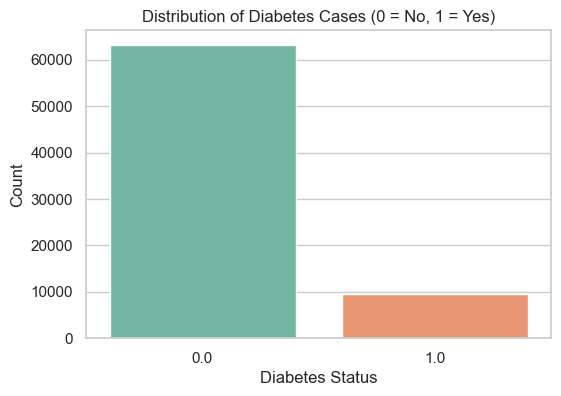

Saved Distribution_countplot.
Diabetes_binary
0.0    86.822579
1.0    13.177421
Name: proportion, dtype: float64


In [20]:
# 1️⃣ Distribution of Target Variable

plt.figure(figsize=(6,4))
sns.countplot(x='Diabetes_binary', data=df, palette="Set2")
plt.title("Distribution of Diabetes Cases (0 = No, 1 = Yes)")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.savefig(os.path.join(PLOTS_DIR,'EDA','Distribution_countplot.png')); plt.show()
print('Saved Distribution_countplot.')

# Percentage distribution
target_dist = df['Diabetes_binary'].value_counts(normalize=True) * 100
print(target_dist)



# Output:
📊 A bar chart showing that ~87% are Non-Diabetic (0) and ~13% are Diabetic (1).

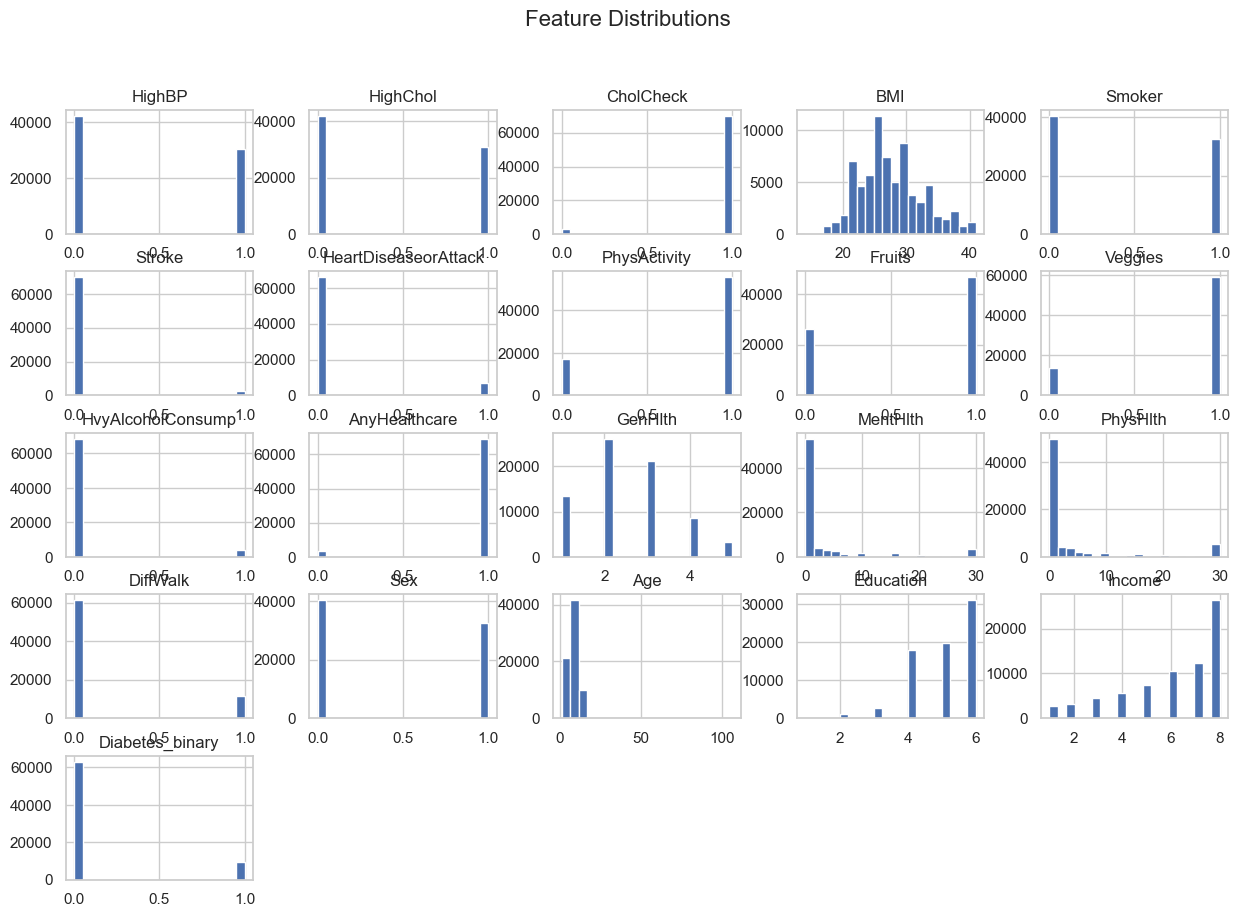

Saved Univariate Analysis Histograms.


In [21]:
# 2️⃣ Histograms for numerical features (Univariate Analysis)
df.hist(figsize=(15,10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.savefig(os.path.join(PLOTS_DIR,'EDA','Univariate_Analysis.png')); plt.show()
print('Saved Univariate Analysis Histograms.')

In [22]:
numeric_df = df.select_dtypes(include=['number'])

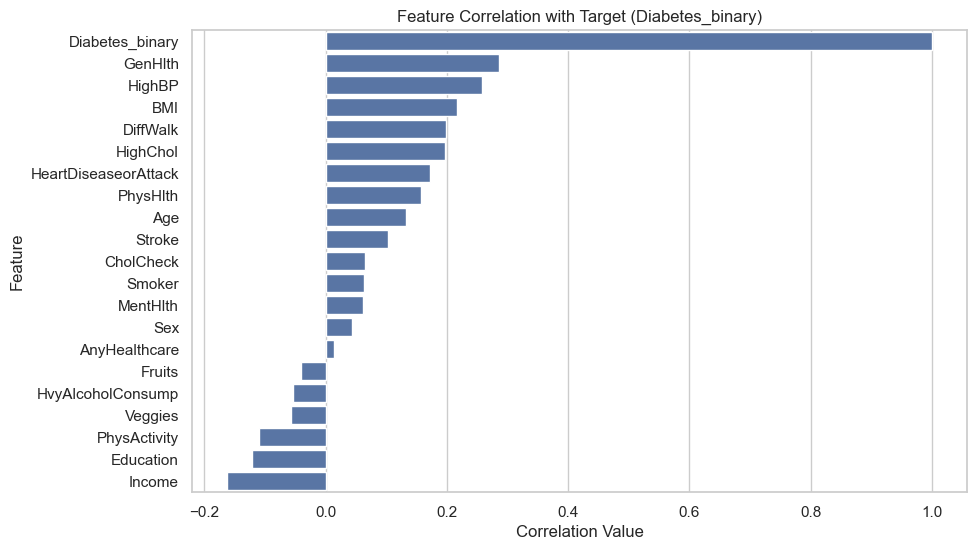

Saved correlation barplot.


In [23]:
# 3️⃣ Correlation with Target

plt.figure(figsize=(10,6))
corr = numeric_df.corr()['Diabetes_binary'].sort_values(ascending=False)
sns.barplot(x=corr.values, y=corr.index)
plt.title("Feature Correlation with Target (Diabetes_binary)")
plt.xlabel("Correlation Value")
plt.ylabel("Feature")
plt.savefig(os.path.join(PLOTS_DIR,'EDA','correlation_barplot.png')); plt.show()
print('Saved correlation barplot.')

# 📊 Day 5 – Exploratory Data Analysis (EDA)¶
# ====================

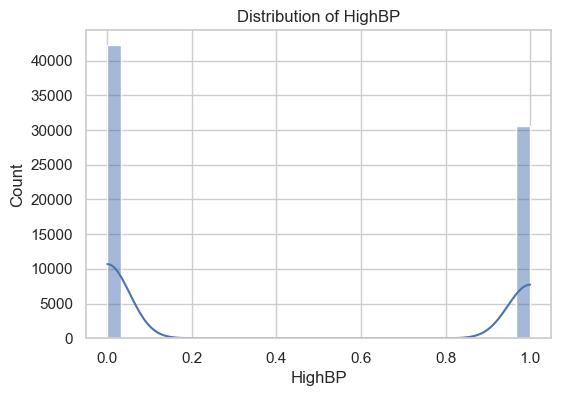

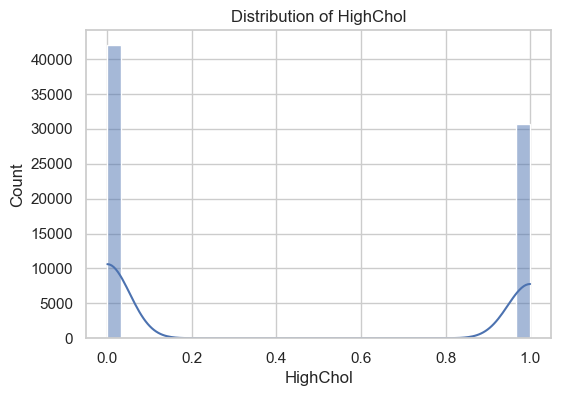

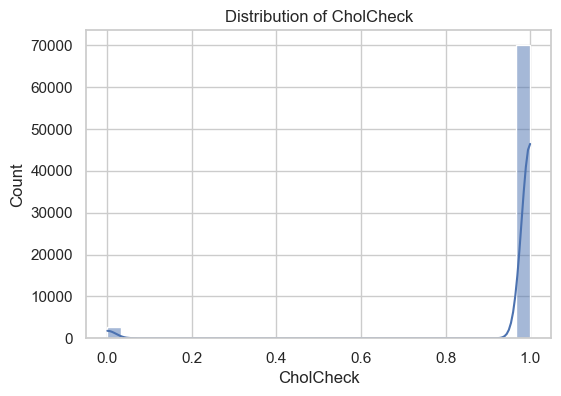

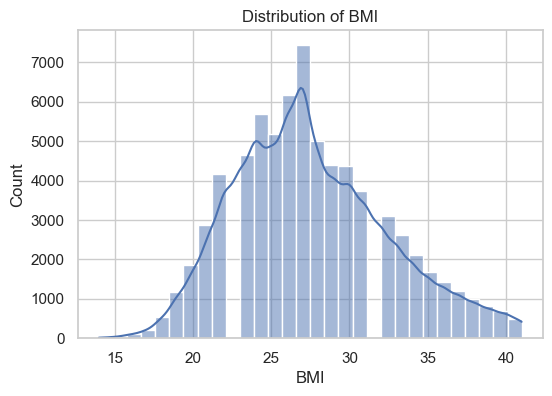

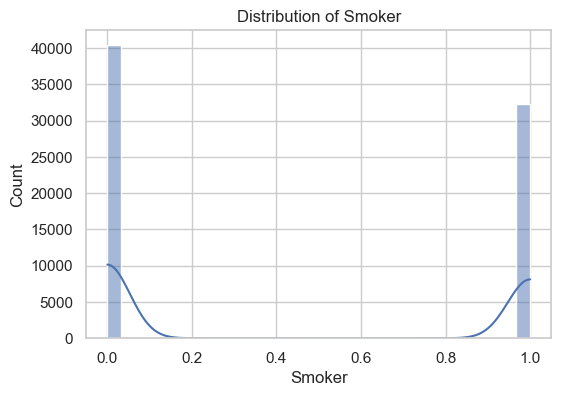

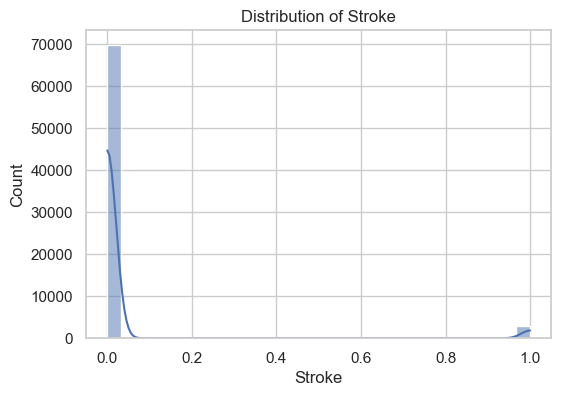

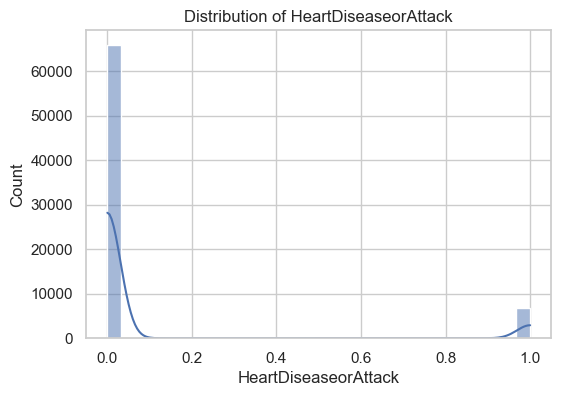

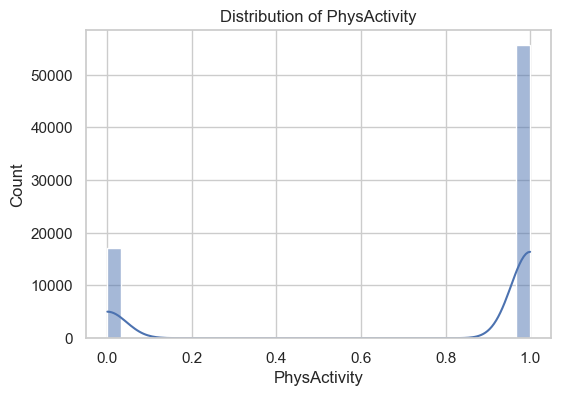

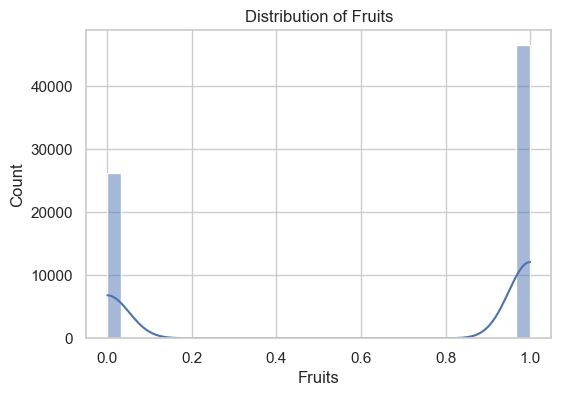

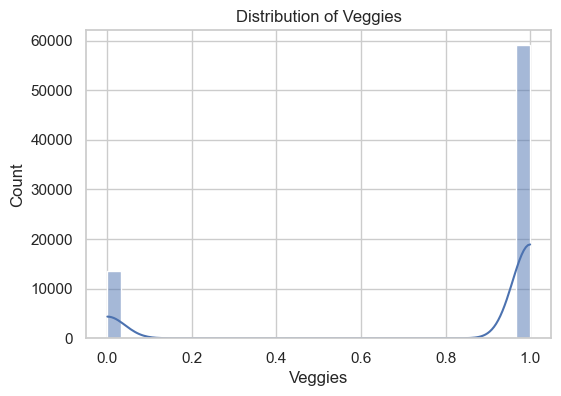

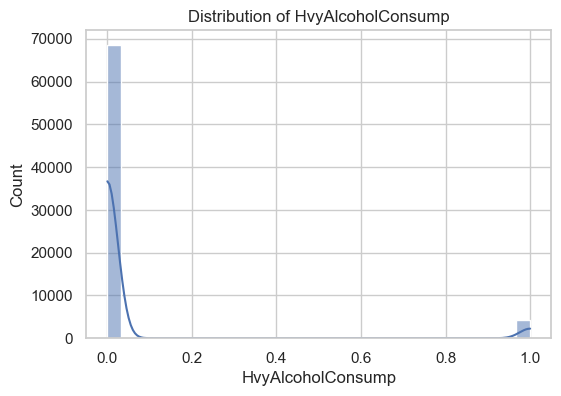

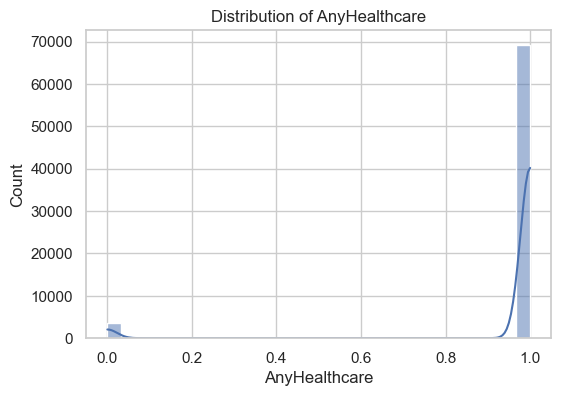

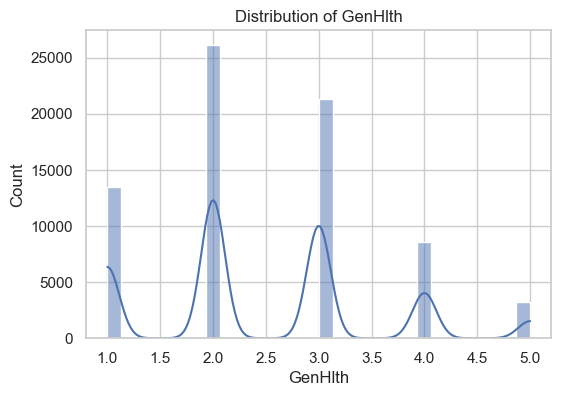

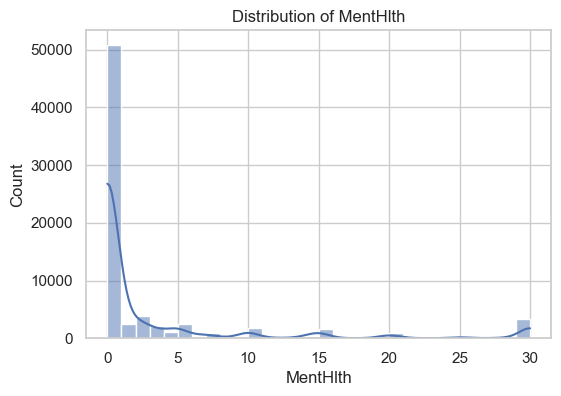

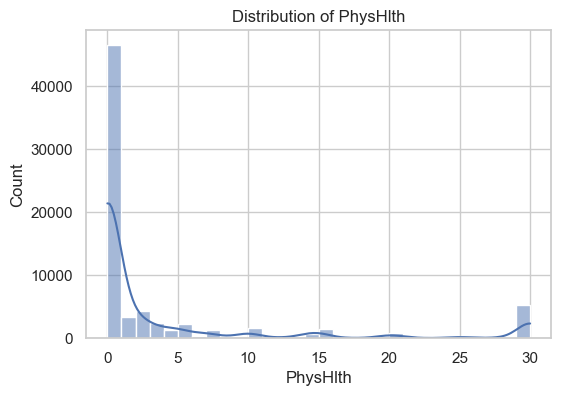

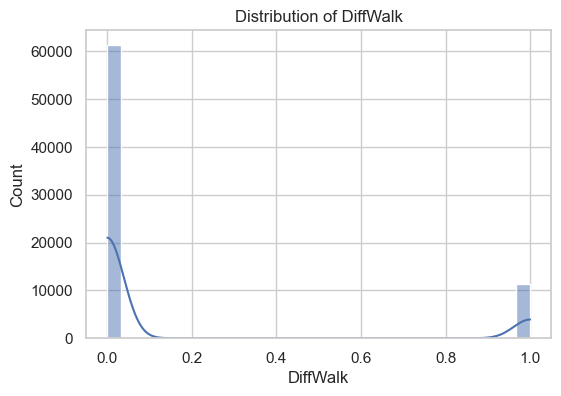

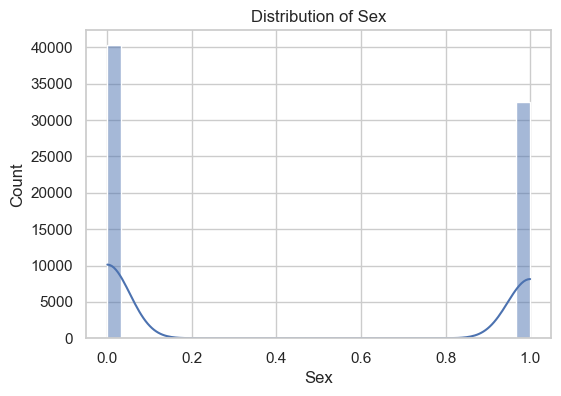

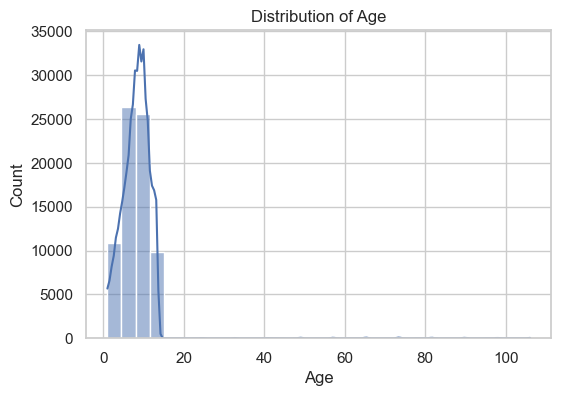

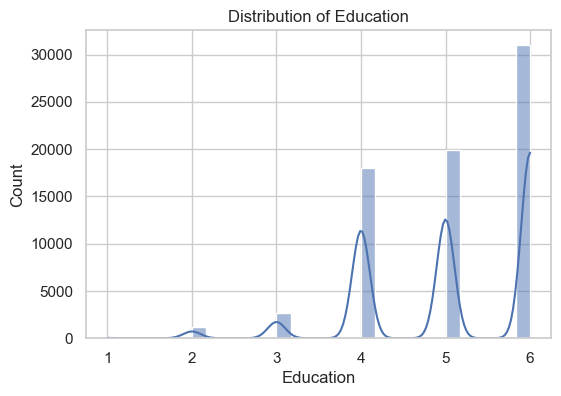

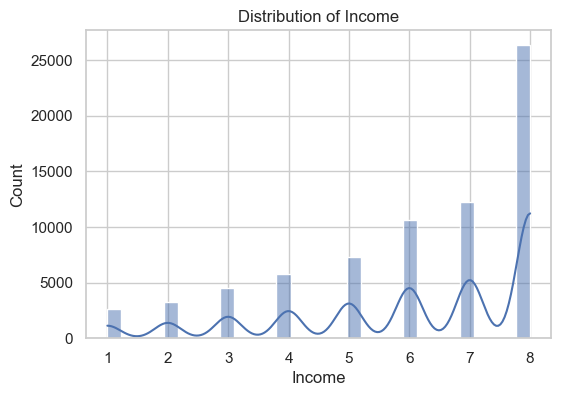

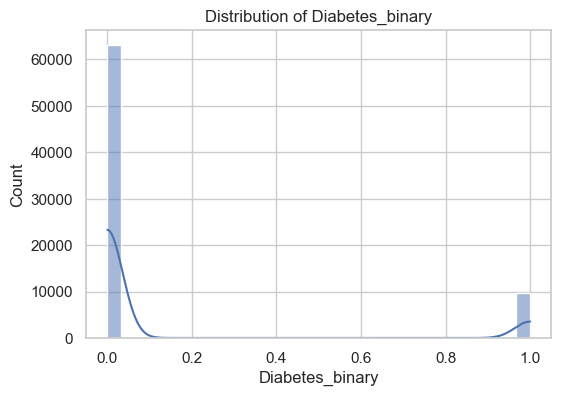

Saved EDA correlation_histplot.


In [24]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.savefig(os.path.join(PLOTS_DIR,'EDA',f'hist_{col}.png'))
    plt.show()
print('Saved EDA correlation_histplot.')

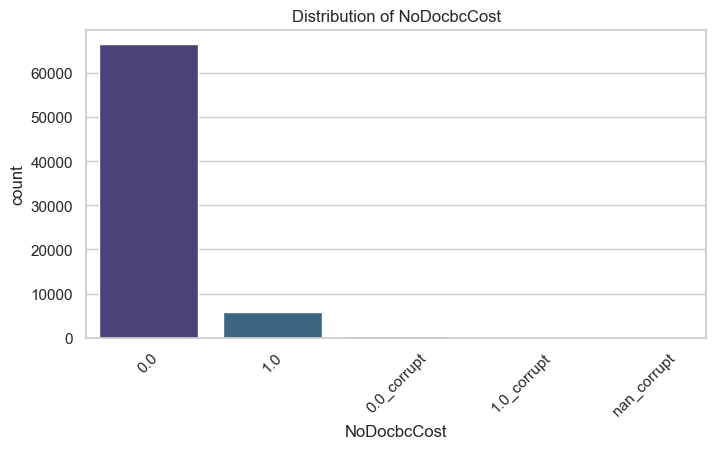

In [25]:
# Categorical Variable Analysis
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

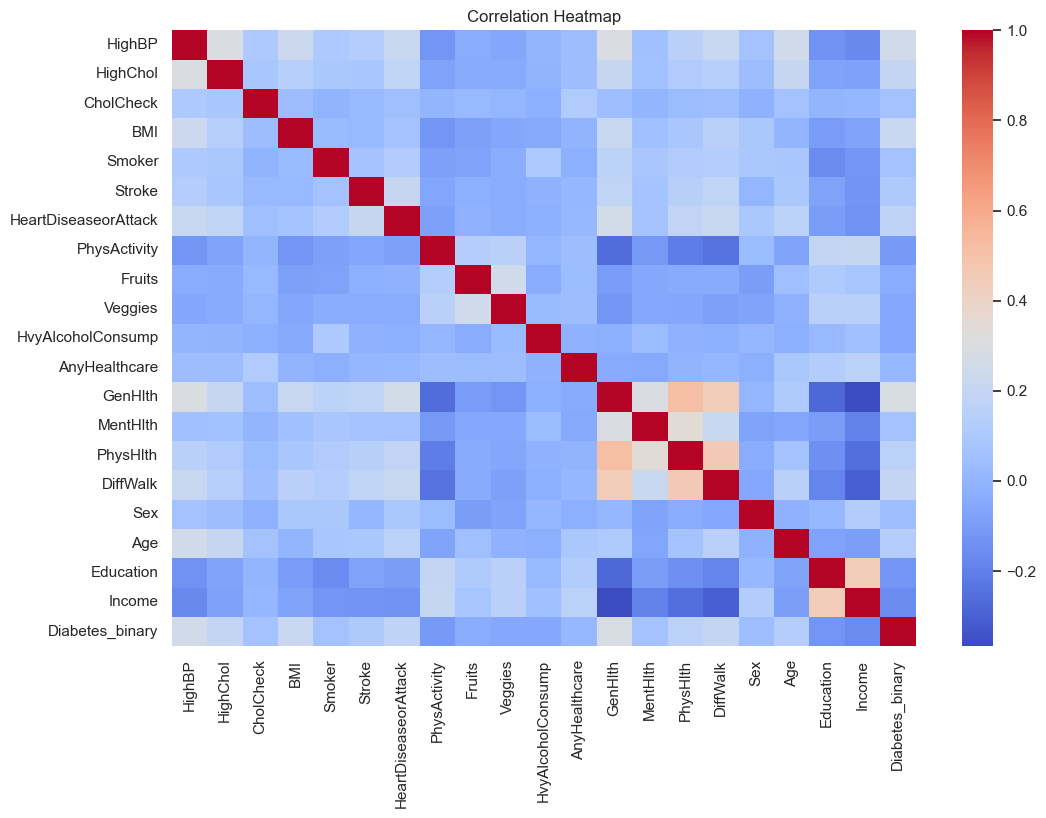

Saved correlation heatmap.


In [26]:
# 4️⃣ Correlation Analysis
plt.figure(figsize=(12,8))
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.savefig(os.path.join(PLOTS_DIR,'EDA','correlation_heatmap.png')); plt.show()
print('Saved correlation heatmap.')

# Output:
🌡 Heatmap showing correlation between features.
Notable:

* HighBP, HighChol, BMI, GenHlth, Age are positively correlated with Diabetes_binary.
* High correlation between HighBP and HighChol
* Moderate correlation of BMI with diabetes outcome
* Most categorical variables weakly correlated with target.

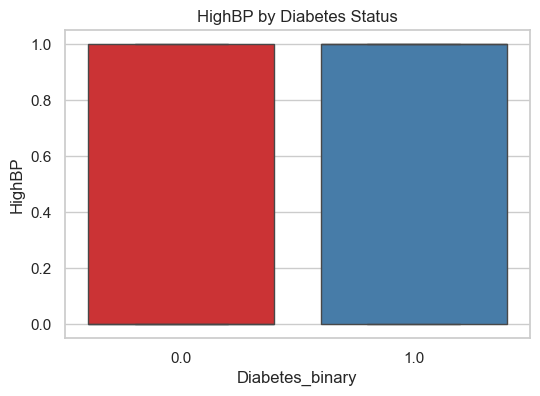

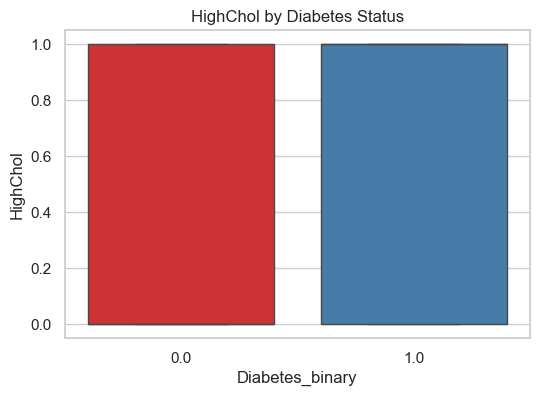

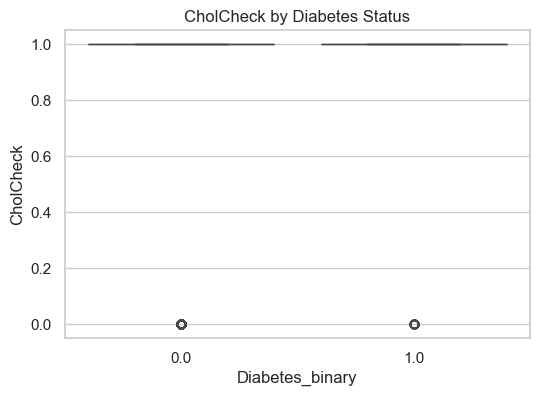

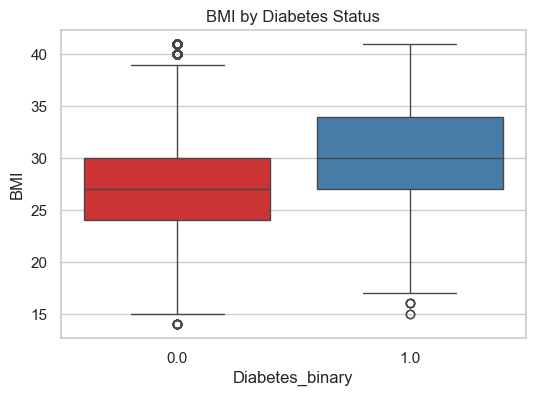

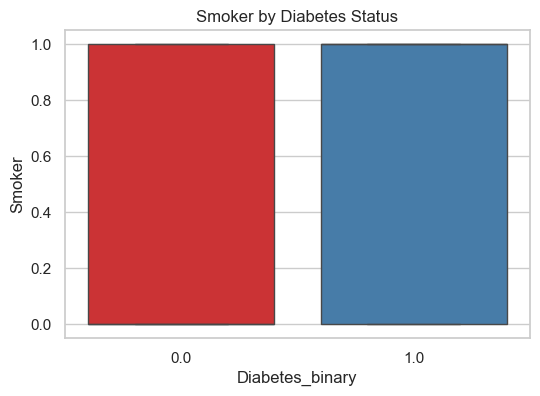

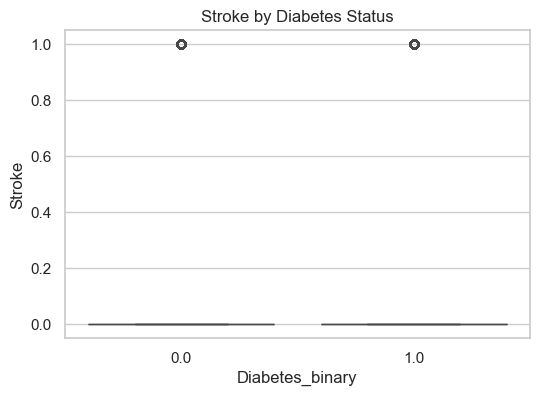

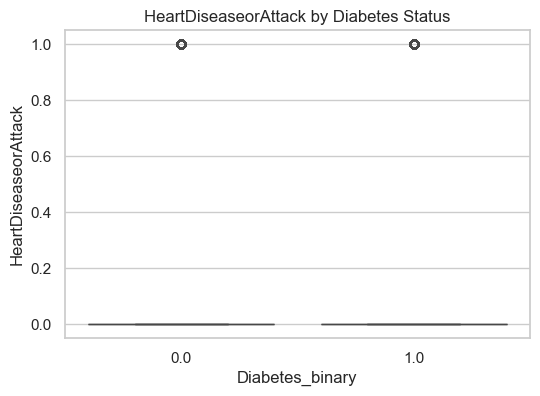

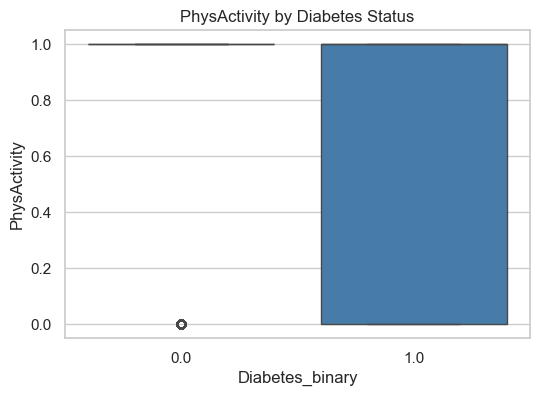

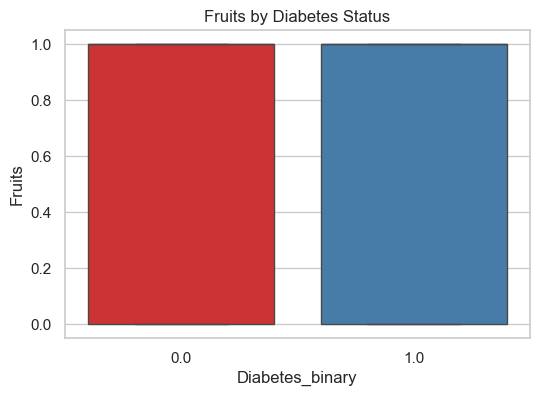

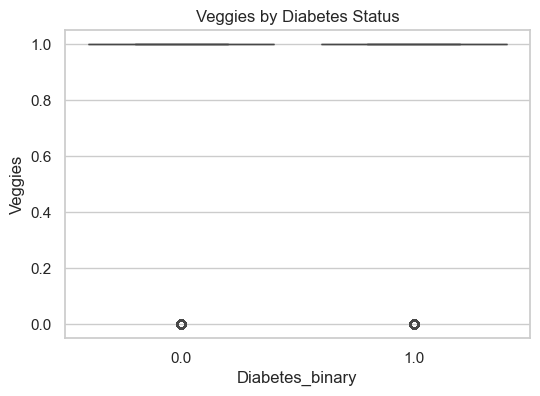

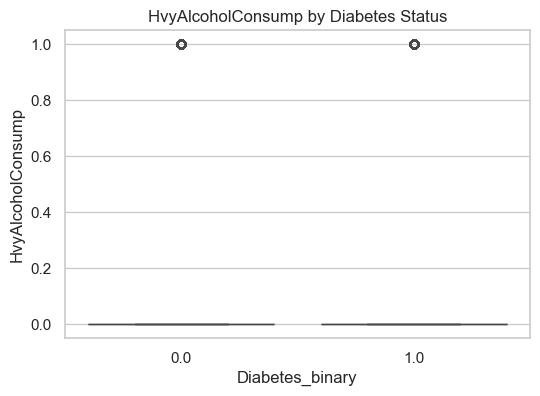

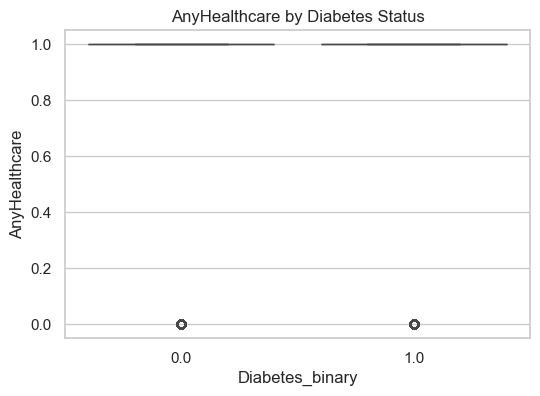

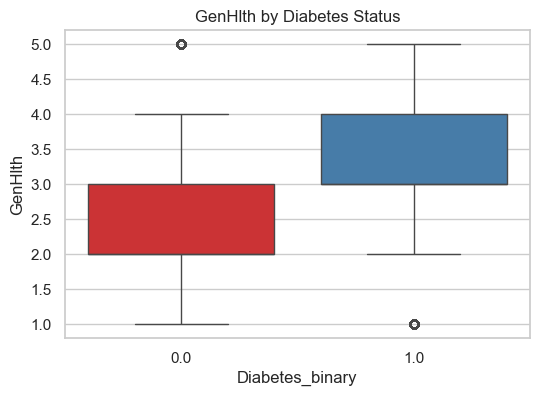

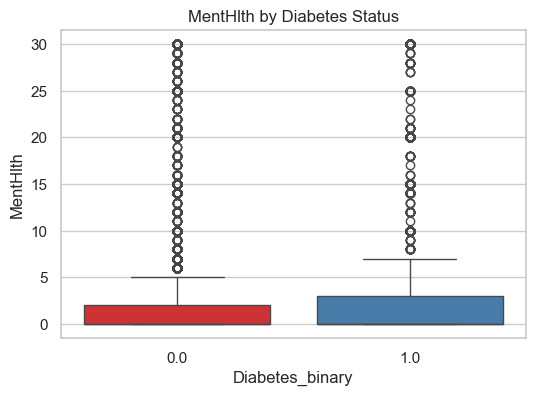

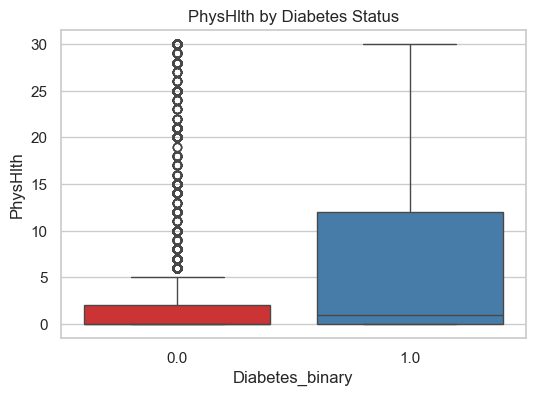

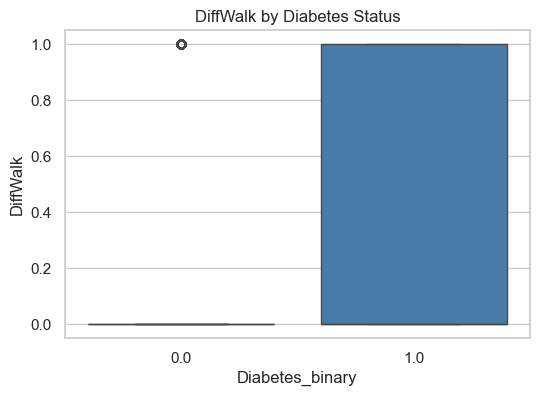

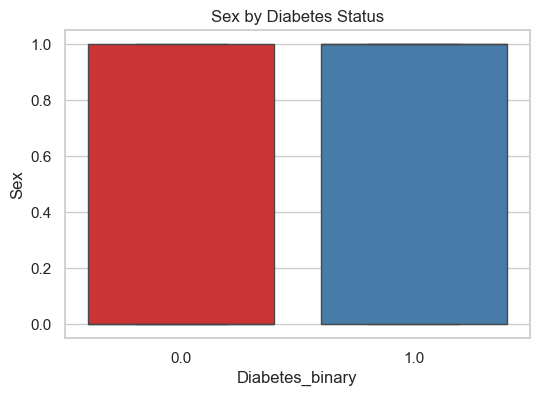

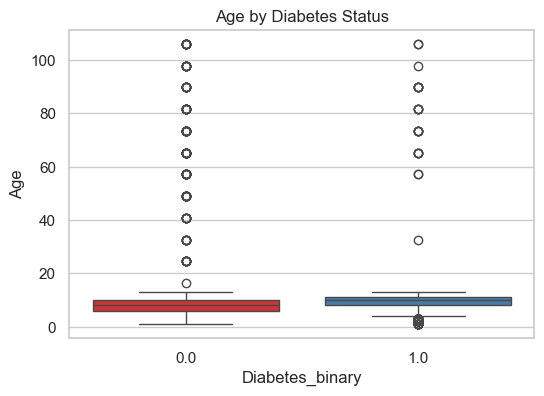

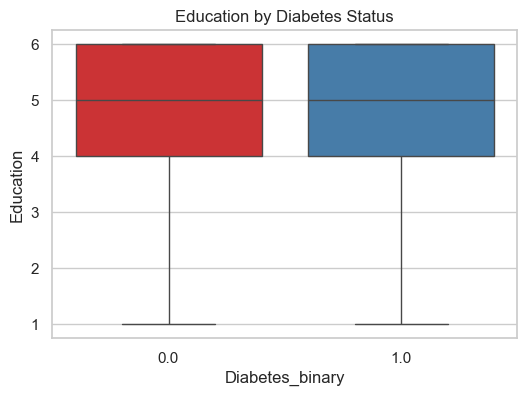

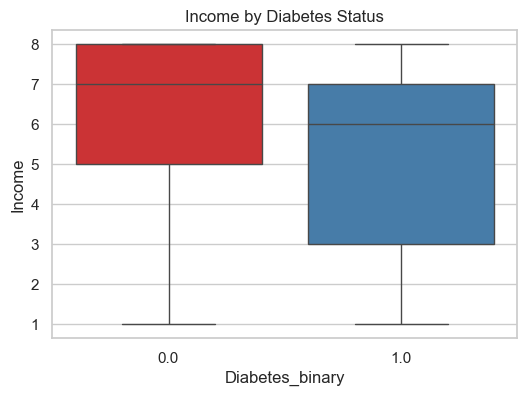

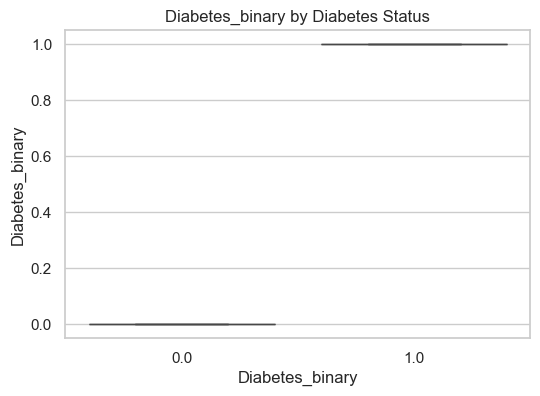

Saved EDA Feature Relationship.


In [27]:
# 5️⃣ Feature Relationship with Target
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Diabetes_binary', y=col, data=df, palette="Set1")
    plt.title(f"{col} by Diabetes Status")
    plt.savefig(os.path.join(PLOTS_DIR,'EDA',f'boxplot_{col}.png'))
    plt.show()
print('Saved EDA Feature Relationship.')

# 📘 Day 6 – Feature Engineering & Preparation
# =========================================

After EDA, I transformed and prepared features for modeling.

**Steps performed:**
1. Standardized continuous features (Age, BMI, PhysHlth, MentHlth).
2. Verified encoding of categorical variables (already numeric).
3. Created Age bins (Young, Middle, Senior).
4. Derived lifestyle interaction features (Smoker + Alcohol).
5. Dropped irrelevant/unnecessary columns (e.g., `Unnamed: 0`).
6. Saved the processed dataset for model building.

In [28]:
# Scaling numerical columns
scaler = StandardScaler()
df[['BMI','Age','PhysHlth','MentHlth']] = scaler.fit_transform(df[['BMI','Age','PhysHlth','MentHlth']])

In [29]:
# --- BMI Categories ---
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0,18.5,25,30,100], 
                            labels=['Under','Normal','Over','Obese '])

df['Age_Category'] = pd.cut(df['Age'], bins=[0,24,44,64,120], 
                            labels=['Youth','Adult','Middle-aged','Senior'])

In [30]:
# Interaction Feature: Smoker + Alcohol
df['Smoke_Alcohol'] = df['Smoker'] * df['HvyAlcoholConsump']
df['BMIxAge'] = df['BMI'] * df['Age']

In [31]:
# --- Combine related features (e.g., Exercise and Fruits/Veggies into Lifestyle Score) ---
df['Lifestyle_Score'] = df['PhysActivity'] + df['Fruits'] + df['Veggies']

In [32]:
# Encoding Categorical Variables (if any)
label_encoders = {}
for col in df.select_dtypes(include=['category', 'object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [33]:
# Save prepared dataset
df.to_csv("diabetes_prepared.csv", index=False)
print("✅ Dataset saved as diabetes_prepared.csv and ready for modeling")

✅ Dataset saved as diabetes_prepared.csv and ready for modeling


## 🎯 Day-7 and Day-8 Model Building (Baseline and Ensemble)
# =========================================
🔹 Objectives
* Split the dataset into training and testing sets.

* Build baseline classification models.

* Evaluate performance using accuracy, precision, recall, F1-score, and confusion matrix.

* Compare models to identify the best starting point.

In [34]:
# 1️⃣ ML models- Import Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [35]:
# Evaluation metrics Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [36]:
# Target column (assuming "Diabetes_binary" is target)
X = df.drop("Diabetes_binary", axis=1)
y = df['Diabetes_binary'].astype(int)

In [37]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (58220, 26)
Test size: (14556, 26)


In [39]:
# Handle class imbalance more robustly
pos_rate = y_train.mean()
scale_pos_weight = (1 - pos_rate) / pos_rate if pos_rate > 0 else 1.0

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier( random_state=42, n_jobs=-1),
    #"Support Vector Machine": SVC(probability= False, random_state=42),
    "Naive Bayes": GaussianNB(),
    #"K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier( colsample_bytree=0.8, random_state=42, eval_metric='logloss', n_jobs=-1, scale_pos_weight=scale_pos_weight )
} # removing KNN and SVC model, due to avoid kernel termination, low model accuracy, ROC-AUC accuracy and taking much time

### Model Selection Rationale
- **Logistic Regression**: Simple, interpretable baseline for risk classification.
- **Decision Tree**: Captures non-linear relationships and interactions.
- **Random Forest**: Reduces variance, handles categorical + imbalanced data better.
- **XGBoost**: Advanced boosting algorithm for higher accuracy and feature importance insights.

# Day-9 and Day 10 – Model Evaluation and Cross-Validation


===== Running Logistic Regression =====
Logistic Regression Results ✅
CV ROC-AUC: 0.8222
Test Acc/Prec/Rec/F1: 0.870/0.528/0.151/0.235
Test ROC-AUC: 0.8230
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     12638
           1       0.53      0.15      0.24      1918

    accuracy                           0.87     14556
   macro avg       0.71      0.57      0.58     14556
weighted avg       0.84      0.87      0.84     14556



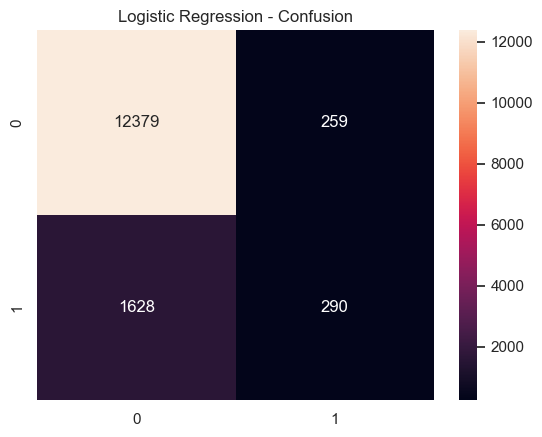


===== Running Decision Tree =====
Decision Tree Results ✅
CV ROC-AUC: 0.5907
Test Acc/Prec/Rec/F1: 0.798/0.270/0.311/0.289
Test ROC-AUC: 0.5905
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12638
           1       0.27      0.31      0.29      1918

    accuracy                           0.80     14556
   macro avg       0.58      0.59      0.59     14556
weighted avg       0.81      0.80      0.80     14556



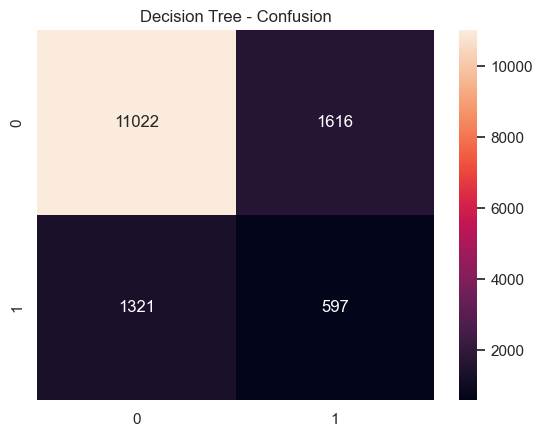


===== Running Random Forest =====
Random Forest Results ✅
CV ROC-AUC: 0.7953
Test Acc/Prec/Rec/F1: 0.867/0.480/0.158/0.238
Test ROC-AUC: 0.8017
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     12638
           1       0.48      0.16      0.24      1918

    accuracy                           0.87     14556
   macro avg       0.68      0.57      0.58     14556
weighted avg       0.83      0.87      0.84     14556



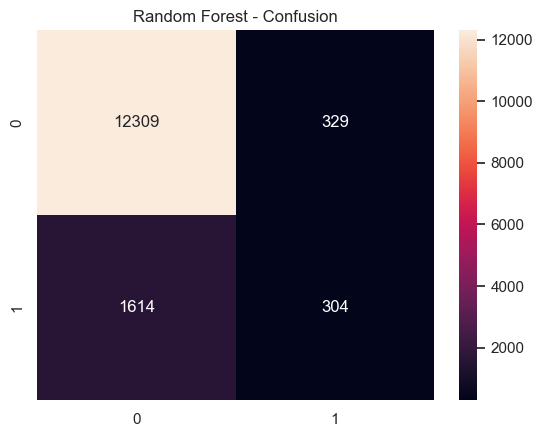


===== Running Naive Bayes =====
Naive Bayes Results ✅
CV ROC-AUC: 0.7814
Test Acc/Prec/Rec/F1: 0.769/0.312/0.628/0.417
Test ROC-AUC: 0.7894
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     12638
           1       0.31      0.63      0.42      1918

    accuracy                           0.77     14556
   macro avg       0.62      0.71      0.64     14556
weighted avg       0.85      0.77      0.80     14556



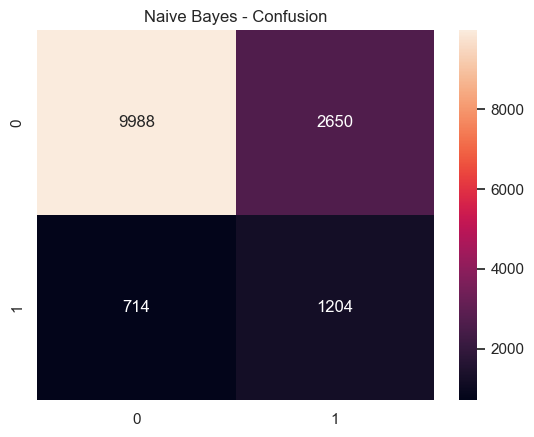


===== Running XGBoost =====
XGBoost Results ✅
CV ROC-AUC: 0.8071
Test Acc/Prec/Rec/F1: 0.743/0.306/0.746/0.434
Test ROC-AUC: 0.8175
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     12638
           1       0.31      0.75      0.43      1918

    accuracy                           0.74     14556
   macro avg       0.63      0.74      0.63     14556
weighted avg       0.87      0.74      0.78     14556



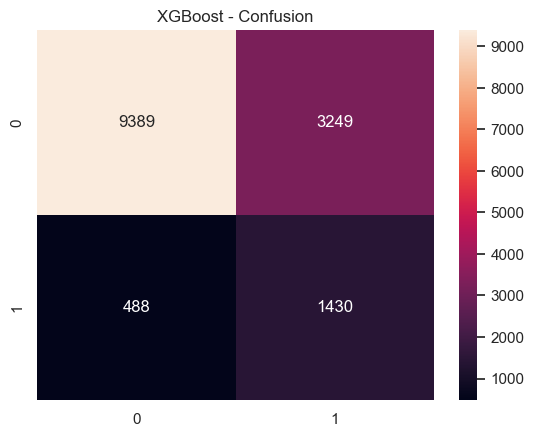

In [41]:
results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n===== Running {name} =====")
    try:
         # Cross-val ROC-AUC
        try:
            cv_auc = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
            cv_auc_mean = cv_auc.mean()
        except Exception as e:
            print(f"⚠️ {name} CV failed: {e}")
            cv_auc_mean = np.nan

        # Fit and evaluate on hold-out test
        try:
            model.fit(X_train, y_train)
        except Exception as e:
            print(f"❌ {name} failed to fit: {e}")
            continue  # skip this model, move to next one
            
        y_pred = model.predict(X_test)

        try:
            y_prob = model.predict_proba(X_test)[:, 1]
            test_auc = roc_auc_score(y_test, y_prob)
        except Exception as e:
            print(f"⚠️ {name} probability/ROC-AUC failed: {e}")
            y_prob = None
            test_auc = np.nan

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results[name] = {
            "CV ROC-AUC": cv_auc_mean,
            "Test Accuracy": acc,
            "Test Precision": prec,
            "Test Recall": rec,
            "Test F1": f1,
            "Test ROC-AUC": test_auc
        }

        print(f"{name} Results ✅")
        print(f"CV ROC-AUC: {cv_auc_mean:.4f}")
        print(f"Test Acc/Prec/Rec/F1: {acc:.3f}/{prec:.3f}/{rec:.3f}/{f1:.3f}")
        print(f"Test ROC-AUC: {test_auc:.4f}")
        print(classification_report(y_test, y_pred, zero_division=0))
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d'); plt.title(name+' - Confusion'); plt.show()

    except Exception as e:
        print(f"💥 Unexpected error in {name}: {e}")


In [42]:
# Convert results dictionary into DataFrame (if not already)
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={"index": "Model"}, inplace=True)
results_df.to_csv('model_results.csv', index=False)
results_df.head()

,Model,CV ROC-AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test ROC-AUC
0,Logistic Regression,0.822209,0.870363,0.528233,0.151199,0.235103,0.823029
1,Decision Tree,0.590735,0.798228,0.269770,0.311262,0.289034,0.590528
2,Random Forest,0.795349,0.866516,0.480253,0.158498,0.238338,0.801685
3,Naive Bayes,0.781435,0.768893,0.312403,0.627737,0.417186,0.789392
4,XGBoost,0.807129,0.743267,0.305621,0.745568,0.433530,0.817541


# Day 11 – Model Interpretation Visuals

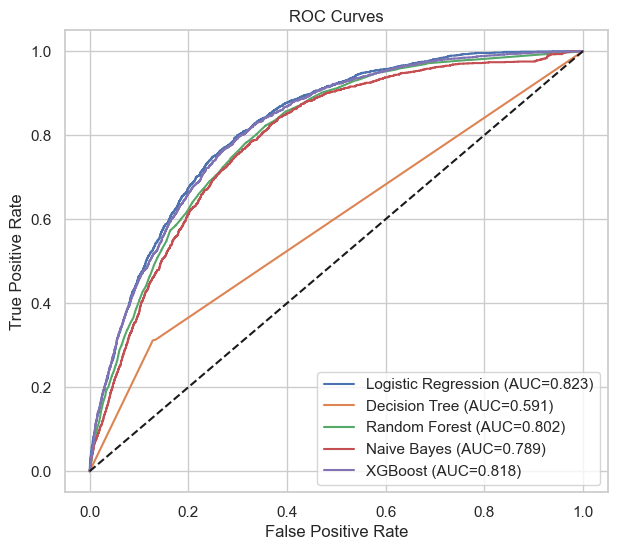

Saved ROC for models.


In [43]:
# ROC Curve
plt.figure(figsize=(7,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.savefig(os.path.join(PLOTS_DIR,'Models','ROC_Curve.png')); plt.show()
print('Saved ROC for models.')

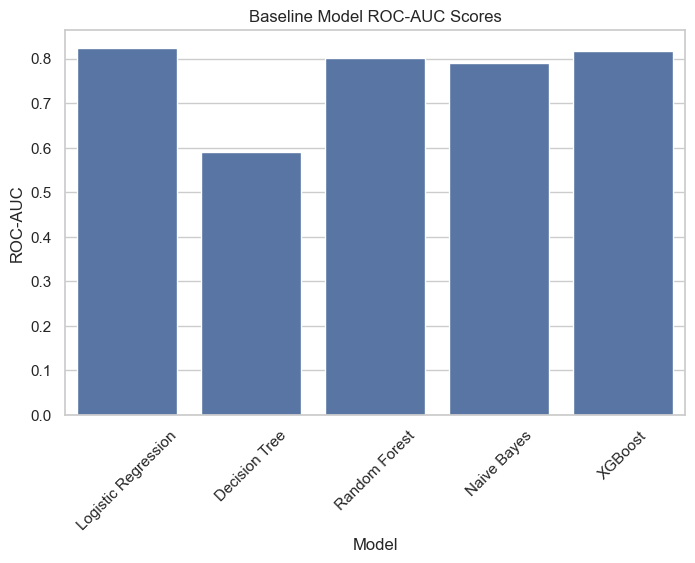

Saved ROC plot for models.


In [44]:
# Plot ROC-AUC (only if available)
if results_df["Test ROC-AUC"].notnull().any():
    plt.figure(figsize=(8,5))
    sns.barplot(x="Model", y="Test ROC-AUC", data=results_df)
    plt.xticks(rotation=45)
    plt.title("Baseline Model ROC-AUC Scores")
    plt.ylabel("ROC-AUC")
    plt.savefig(os.path.join(PLOTS_DIR,'Models','ROC-AUC_plot.png')); plt.show()
print('Saved ROC plot for models.')

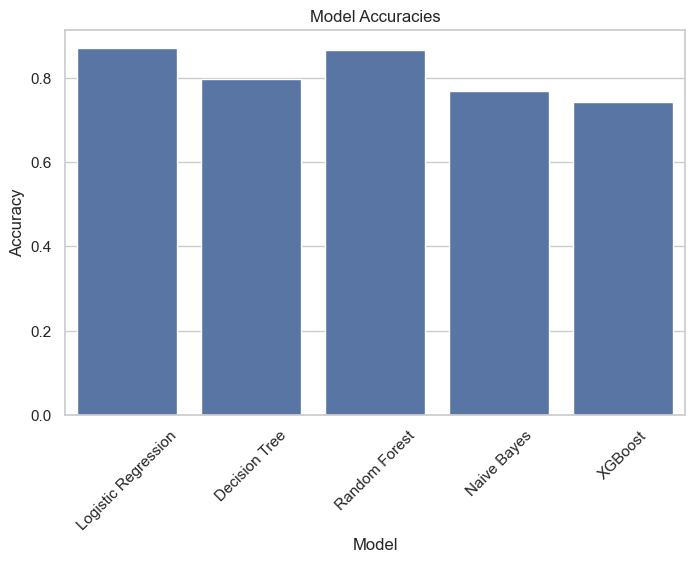

Saved plot for compare Model Accuracies.


In [45]:
# Plot Accuracy
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Test Accuracy", data= results_df)
plt.xticks(rotation=45)
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.savefig(os.path.join(PLOTS_DIR,'Models','Model_Accuracies_plot.png')); plt.show()
print('Saved plot for compare Model Accuracies.')

In [46]:
# Melt the dataframe for grouped plotting
plot_df = results_df.melt(id_vars="Model", value_vars=["Test Accuracy", "Test ROC-AUC"], 
                          var_name="Metric", value_name="Score")

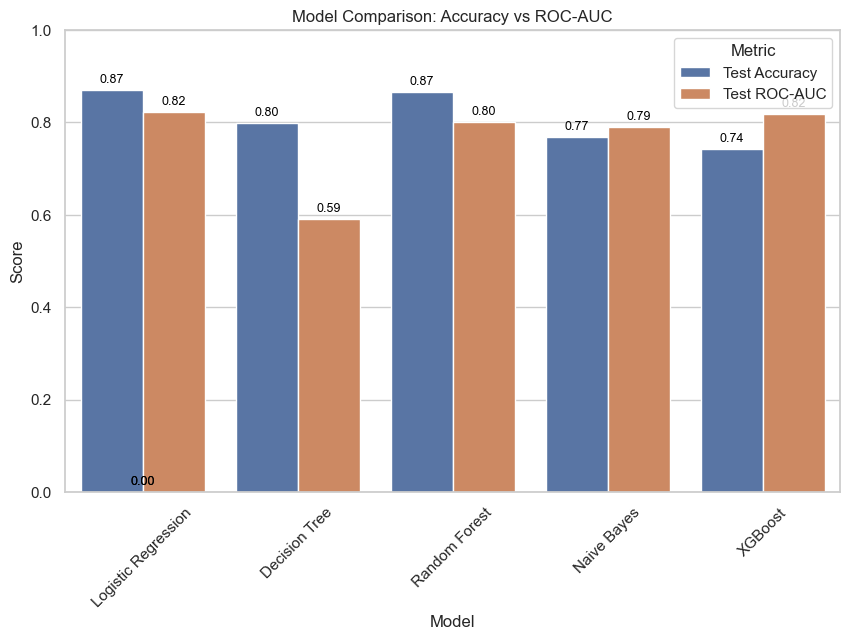

Saved plot Model Comparison: Accuracy vs ROC-AUC.


In [47]:
# Grouped barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Model", y="Score", hue="Metric", data=plot_df)

# Add score labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha="center", va="bottom", fontsize=9, color="black", xytext=(0, 3), 
                textcoords="offset points")
    
plt.xticks(rotation=45)
plt.title("Model Comparison: Accuracy vs ROC-AUC")
plt.ylabel("Score")
plt.ylim(0,1)  # since Accuracy/ROC-AUC are between 0 and 1
plt.legend(title="Metric")
plt.savefig(os.path.join(PLOTS_DIR,'Models','Accuracy vs ROC-AUC plot.png')); plt.show()
print('Saved plot Model Comparison: Accuracy vs ROC-AUC.')

In [48]:
# Find best model based on Accuracy
best_model = max(results, key=lambda k: results[k]['Test Accuracy'])
best_acc = results[best_model]['Test Accuracy']
best_auc = results[best_model]['Test ROC-AUC']

print(f"Best Baseline Model: {best_model} "
      f"with Accuracy = {best_acc:.4f} "
      f"and ROC-AUC = {best_auc:.4f}")

Best Baseline Model: Logistic Regression with Accuracy = 0.8704 and ROC-AUC = 0.8230


# Day 12 – Hyperparameter Tuning

In [49]:
# Dictionary to store results
results = {}

# ---------------- Logistic Regression ----------------
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' needs solver='liblinear' or 'saga'
    'solver': ['lbfgs', 'liblinear']
}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=cv, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train, y_train)
results['Logistic Regression'] = {
    "Best Params": grid_lr.best_params_,
    "Best Accuracy": grid_lr.best_score_
}

In [50]:
# ---------------- Random Forest ----------------
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
results['Random Forest'] = {
    "Best Params": grid_rf.best_params_,
    "Best Accuracy": grid_rf.best_score_
}

In [53]:
# ---------------- XGBoost ----------------
xgb = XGBClassifier( use_label_encoder=False,  random_state=42,  eval_metric='logloss', n_jobs=-1 )
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
results['XGBoost'] = {
    "Best Params": grid_xgb.best_params_,
    "Best Accuracy": grid_xgb.best_score_
}

In [54]:
# ---------------- Compare Results ----------------
import pandas as pd
results_dg = pd.DataFrame(results).T
results_dg.to_csv('Hyperparameter_model_results.csv', index=False)
results_dg.head()
results_dg

,Best Params,Best Accuracy
Logistic Regression,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.870629
Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.871075
XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.871247


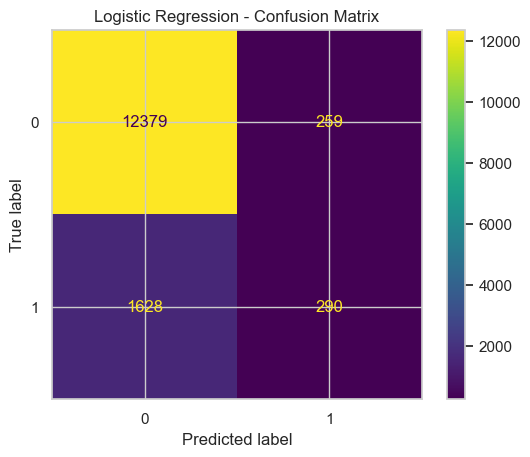

Saved Confusion Matrix for models.


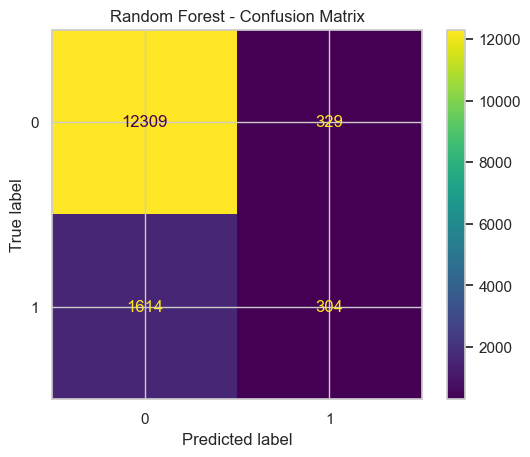

Saved Confusion Matrix for models.


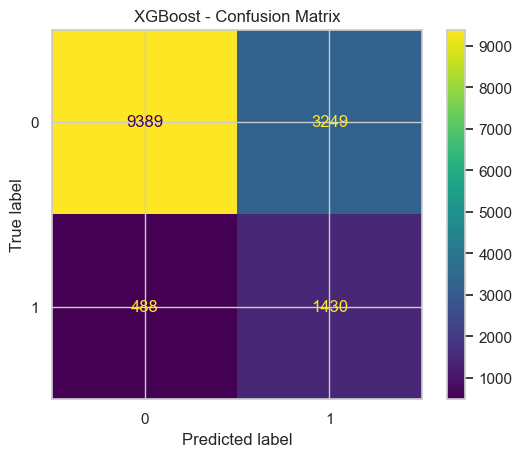

Saved Confusion Matrix for models.


In [55]:
# Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
log_model = models["Logistic Regression"]
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.title(f"{"Logistic Regression"} - Confusion Matrix")
plt.savefig(os.path.join(PLOTS_DIR,'Models','Confusion_Matrix.png')); plt.show()
print('Saved Confusion Matrix for models.')


rf_model = models["Random Forest"]
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title(f"{"Random Forest"} - Confusion Matrix")
plt.savefig(os.path.join(PLOTS_DIR,'Models','Confusion_Matrix.png')); plt.show()
print('Saved Confusion Matrix for models.')


xgb_model = models["XGBoost"]
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title(f"{"XGBoost"} - Confusion Matrix")
plt.savefig(os.path.join(PLOTS_DIR,'Models','Confusion_Matrix.png')); plt.show()
print('Saved Confusion Matrix for models.')

# Output:
🟦 Confusion Matrix Heatmap.

* True Negatives (TN): High

* True Positives (TP): Moderate

* False Negatives (FN): High (many diabetics missed).

# Day 13 – SHAP Analysis

In [56]:
try:
    import shap
    lg_best = grid_lr.best_estimator_
    explainer = shap.TreeExplainer(lg_best)
    sample = X.sample(100, random_state=42)
    shap_values = explainer.shap_values(sample)
    shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values, sample)
except Exception as e:
    print('SHAP not run (install shap or use smaller sample). Error:', e)


SHAP not run (install shap or use smaller sample). Error: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>


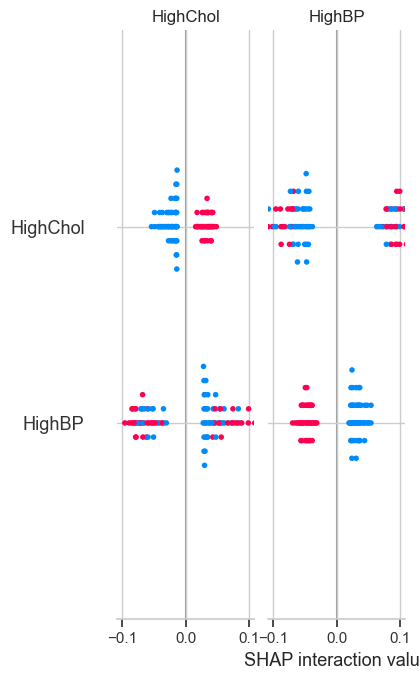

<Figure size 640x480 with 0 Axes>

Saved rf SHAP summary.


In [57]:

try:
    import shap
    rf_best = grid_rf.best_estimator_
    explainer = shap.TreeExplainer(rf_best)
    sample = X.sample(100, random_state=42)
    shap_values = explainer.shap_values(sample)
    shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values, sample)
    plt.savefig(os.path.join(PLOTS_DIR,'SHAP','RF_shap_summary.png')); plt.show()
    print('Saved rf SHAP summary.')
except Exception as e:
    print('SHAP not run (install shap or use smaller sample). Error:', e)

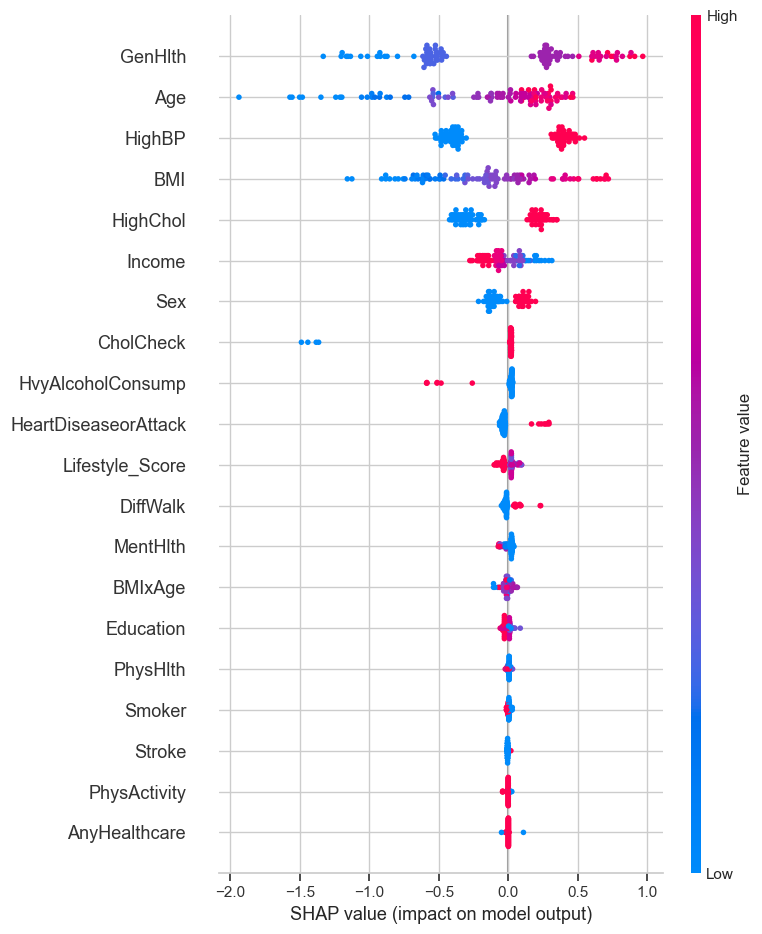

<Figure size 640x480 with 0 Axes>

Saved XGB SHAP summary.


In [58]:
    xgb_best = grid_xgb.best_estimator_
    explainer = shap.TreeExplainer(xgb_best)
    sample = X.sample(100, random_state=42)
    shap_values = explainer.shap_values(sample)
    shap.summary_plot(shap_values[1] if isinstance(shap_values, list) else shap_values, sample)
    plt.savefig(os.path.join(PLOTS_DIR,'SHAP','XGB_shap_summary.png')); plt.show()
    print('Saved XGB SHAP summary.')

# Day 14 – Final Model Selection & Saving

In [59]:
# Initialize GridSearchCV
rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 5, random_state=42, n_estimators=200, n_jobs=-1)

scores = cross_val_score(rf, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('RF CV | ROC-AUC mean/std:', scores.mean(), '|', scores.std())

RF CV | ROC-AUC mean/std: 0.8249807257567042 | 0.0018980901912832263


In [60]:
grid_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring="roc_auc", n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
rf_model = grid_rf.best_estimator_

print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8239598922657793


In [61]:
xgb = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, subsample=0.8,
        random_state=42, eval_metric='logloss', n_jobs=-1 )
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('XGB CV | ROC-AUC mean/std:', scores.mean(), '|', scores.std())

XGB CV | ROC-AUC mean/std: 0.8292464369061701 | 0.0019678499433557674


In [62]:

grid = GridSearchCV(xgb, param_grid_xgb, cv=cv, scoring="roc_auc", n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=-1, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [63]:
# Best model from GridSearch
best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.8288469582238471


In [64]:
# Predictions
y_probs = best_model.predict_proba(X_test)[:, 1]   # probability scores
y_pred = best_model.predict(X_test)

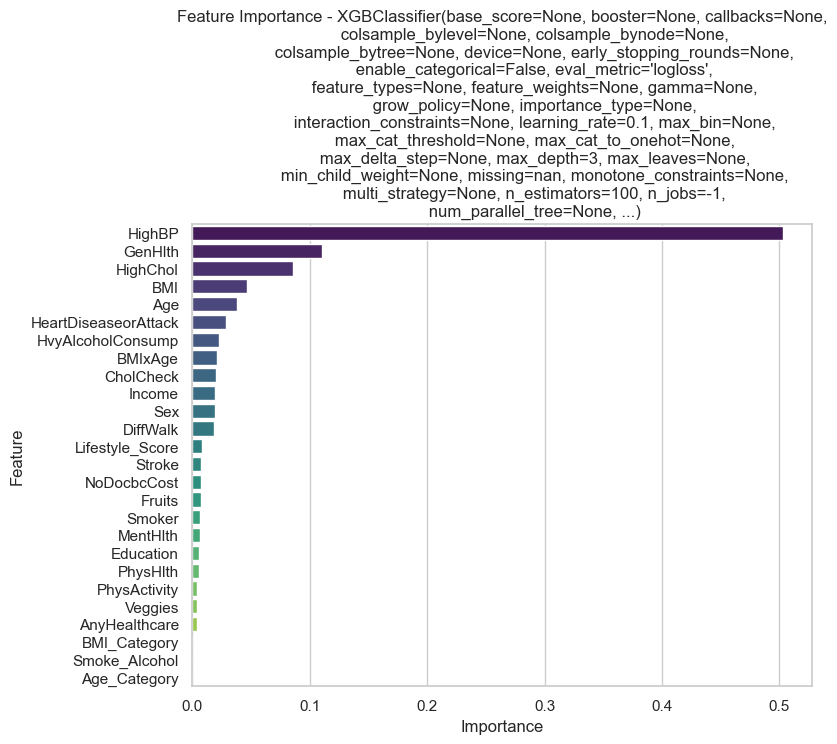


Inference:
    - The top features (like HighBP, HighChol, BMI, age, and physical activity) have the highest impact 
      on diabetes risk classification.
    - These insights can guide preventive strategies and patient counseling.
    


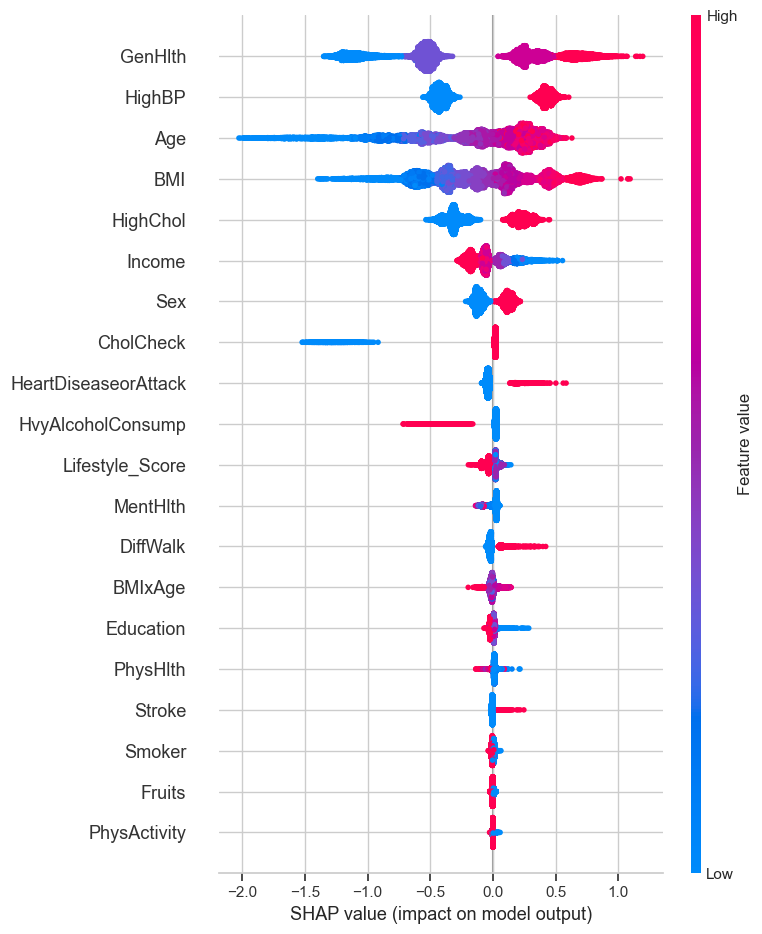

Saved SHAP summary.


In [65]:
# Feature Importance Plot
feature_importances = best_model.feature_importances_
features = X.columns
fi_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=fi_df, x="Importance", y="Feature", palette="viridis")
plt.title(f"Feature Importance - {best_model}")
plt.show()
# Inference
print("""
Inference:
    - The top features (like HighBP, HighChol, BMI, age, and physical activity) have the highest impact 
      on diabetes risk classification.
    - These insights can guide preventive strategies and patient counseling.
    """)
# SHAP values
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=features)
plt.savefig(os.path.join(PLOTS_DIR,'SHAP','xgboost_shap_summary.png')); plt.close()
print('Saved SHAP summary.')

In [66]:
# Model saving
import joblib
# select best (prefer tuned if available)
best_est = grid.best_estimator_ if 'grid' in globals() else xgb
joblib.dump(best_est, 'xgb_baseline_tuned_no_smote.pkl')
print('Saved xgb_baseline_tuned_no_smote.pkl.pkl')

Saved xgb_baseline_tuned_no_smote.pkl.pkl


# Day 15 – Interpretation Visuals

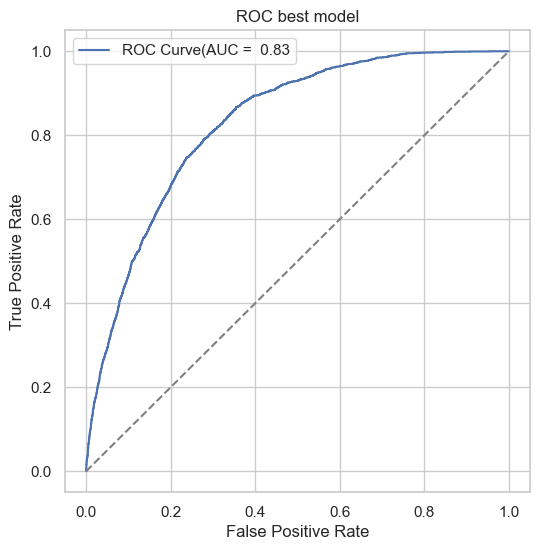

Saved ROC for best xgb_baseline_tuned_no_smote.


In [67]:
import matplotlib.pyplot as plt
# ROC for best and save
best = joblib.load('xgb_baseline_tuned_no_smote.pkl')
yprob = best.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, yprob)
plt.figure(figsize=(6,6)); plt.plot(fpr,tpr, label= f"ROC Curve(AUC = {roc_auc_score(y_test, y_probs): .2f}"); plt.plot([0,1],[0,1],'--', color= "gray")
plt.title('ROC best model'); plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.legend()
plt.savefig(os.path.join(PLOTS_DIR,'Models','roc_best.png')); plt.show()
print('Saved ROC for best xgb_baseline_tuned_no_smote.')


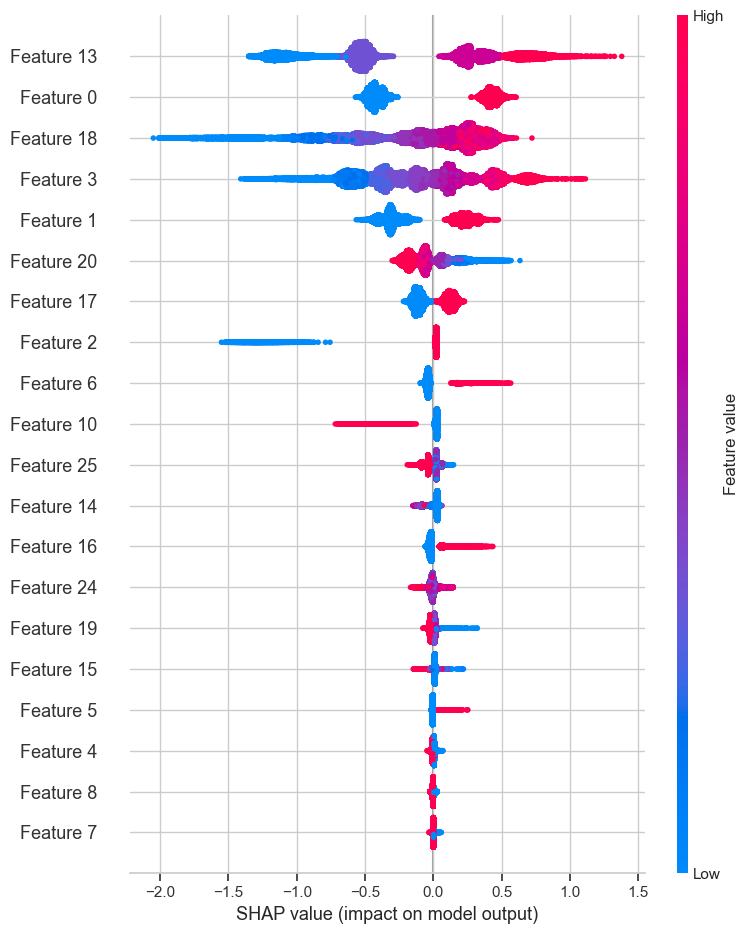

Saved FINAL SHAP xgb_baseline_tuned_no_smote summary.


In [68]:
import shap, numpy as np
best = joblib.load('xgb_baseline_tuned_no_smote.pkl')
# extract model step if pipeline
if hasattr(best, 'named_steps'):
    pre = best.named_steps['preproc']
    mdl = None
    for k in best.named_steps:
        if k!='preproc': mdl = best.named_steps[k]; break
else:
    pre = None; mdl = best
# prepare data for shap
if pre is not None:
    Xshap = pre.transform(X_train)
else:
    Xshap = X_train.select_dtypes(include=['int64','float64']).values
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(Xshap)
shap.summary_plot(shap_values, Xshap, show=False)
plt.savefig(os.path.join(PLOTS_DIR,'SHAP','xgb_baseline_tuned_no_smote_shap_summary.png')); plt.show()
print('Saved FINAL SHAP xgb_baseline_tuned_no_smote summary.')

## 📘 Model saving

In [69]:
os.makedirs('../reports', exist_ok=True)
joblib.dump(grid.best_estimator_, '../reports/xgb_baseline_tuned_no_smote.joblib')
print('Saved model to ../reports/best_model_xgb.joblib')

Saved model to ../reports/best_model_xgb.joblib


# Next Steps: Handle Imbalance with SMOTE

* Recall is low → risk of missing true diabetics.

* Will apply SMOTE oversampling in a separate notebook.